In [2]:
import pandas as pd
from io import StringIO

csv_data = '''A,B,C,D
              1.0,2.0,3.0,4.0
              5.0,6.0,,8.0
              10.0,11.0,12.0'''

df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [3]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [4]:
tmp = df.dropna()
tmp

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [5]:
tmp = df.dropna(axis=1)
tmp

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [6]:
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [7]:
tmp = df.dropna(how='all')
tmp

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [10]:
tmp = df.dropna(thresh=4)
tmp

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [11]:
tmp = df.dropna(subset=['C'])
tmp

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


In [16]:
import numpy as np
from sklearn.impute import SimpleImputer
imr = SimpleImputer(missing_values=np.NaN,strategy='mean')
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

## Sklearn.Imputerについて
バージョン更新でsklearn.impute内のSimpleImputerに変更された模様。  
ドキュメントは以下。  
https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

In [17]:
import pandas as pd
df = pd.DataFrame([
    ['green','M',10.1,'class1'],
    ['red','L',13.5,'class2'],
    ['blue','XL',15.3,'class1']
])

df.columns = ['color','size','price','classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [18]:
size_mapping = {'XL':3,'L':2,'M':1}
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [19]:
inv_size_mapping = {v:k for k,v in size_mapping.items()}
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

In [20]:
import numpy as np
class_mapping = {label:idx for idx, label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [21]:
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [24]:
inv_class_mapping = {v:k for k,v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [25]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([0, 1, 0])

In [26]:
class_le.inverse_transform(y)

array(['class1', 'class2', 'class1'], dtype=object)

In [29]:
X = df[['color','size','price']].values
color_le = LabelEncoder()
X[:,0] = color_le.fit_transform(X[:,0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [34]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ohe = OneHotEncoder()
ct = ColumnTransformer([("categorical", ohe, [0]),
                        ("numeric", "passthrough", [1,2])])
result = ct.fit_transform(X)
result

array([[0.0, 1.0, 0.0, 1, 10.1],
       [0.0, 0.0, 1.0, 2, 13.5],
       [1.0, 0.0, 0.0, 3, 15.3]], dtype=object)

In [35]:
pd.get_dummies(df[['price','color','size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


In [36]:
pd.get_dummies(df[['price','color','size']],drop_first=True)

,price,size,color_green,color_red
0,10.1,1,1,0
1,13.5,2,0,1
2,15.3,3,0,0


In [4]:
import numpy as np
import pandas as pd

In [5]:
df_wine = pd.read_csv('wine.data',header=None)
df_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
df_wine.columns = ['Class label','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
print('Class labes', np.unique(df_wine['Class label']))

Class labes [1 2 3]


In [7]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X,y = df_wine.iloc[:,1].values,df_wine.iloc[:,0].values
X

array([14.23, 13.2 , 13.16, 14.37, 13.24, 14.2 , 14.39, 14.06, 14.83,
       13.86, 14.1 , 14.12, 13.75, 14.75, 14.38, 13.63, 14.3 , 13.83,
       14.19, 13.64, 14.06, 12.93, 13.71, 12.85, 13.5 , 13.05, 13.39,
       13.3 , 13.87, 14.02, 13.73, 13.58, 13.68, 13.76, 13.51, 13.48,
       13.28, 13.05, 13.07, 14.22, 13.56, 13.41, 13.88, 13.24, 13.05,
       14.21, 14.38, 13.9 , 14.1 , 13.94, 13.05, 13.83, 13.82, 13.77,
       13.74, 13.56, 14.22, 13.29, 13.72, 12.37, 12.33, 12.64, 13.67,
       12.37, 12.17, 12.37, 13.11, 12.37, 13.34, 12.21, 12.29, 13.86,
       13.49, 12.99, 11.96, 11.66, 13.03, 11.84, 12.33, 12.7 , 12.  ,
       12.72, 12.08, 13.05, 11.84, 12.67, 12.16, 11.65, 11.64, 12.08,
       12.08, 12.  , 12.69, 12.29, 11.62, 12.47, 11.81, 12.29, 12.37,
       12.29, 12.08, 12.6 , 12.34, 11.82, 12.51, 12.42, 12.25, 12.72,
       12.22, 11.61, 11.46, 12.52, 11.76, 11.41, 12.08, 11.03, 11.82,
       12.42, 12.77, 12.  , 11.45, 11.56, 12.42, 13.05, 11.87, 12.07,
       12.43, 11.79,

In [10]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int64)

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0,stratify=y)

In [12]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_re = X_train.reshape(-1,1)
X_test_re = X_test.reshape(-1,1)

In [13]:
X_train_norm = mms.fit_transform(X_train_re)

In [14]:
X_test_norm = mms.fit_transform(X_test_re)
print('X_train_norm:',X_train_norm)
print('X_test_norm:',X_test_norm)

X_train_norm: [[0.64619883]
 [0.6871345 ]
 [0.67836257]
 [0.61403509]
 [0.34795322]
 [0.19590643]
 [0.23684211]
 [0.32163743]
 [0.37426901]
 [0.11988304]
 [0.60818713]
 [0.72222222]
 [0.39766082]
 [0.39766082]
 [0.47953216]
 [0.53216374]
 [0.17251462]
 [0.66374269]
 [0.67251462]
 [0.60818713]
 [0.01461988]
 [0.79239766]
 [0.05847953]
 [0.29532164]
 [0.01169591]
 [0.49707602]
 [0.48830409]
 [0.7748538 ]
 [0.71637427]
 [0.47953216]
 [0.62865497]
 [0.84502924]
 [0.24561404]
 [0.47953216]
 [0.13450292]
 [0.57894737]
 [0.51169591]
 [0.12573099]
 [0.40935673]
 [0.4122807 ]
 [1.        ]
 [0.45321637]
 [0.80409357]
 [0.51461988]
 [0.86842105]
 [0.28070175]
 [0.51169591]
 [0.79532164]
 [0.06725146]
 [0.61695906]
 [0.23391813]
 [0.47953216]
 [0.36842105]
 [0.55263158]
 [0.25730994]
 [0.07017544]
 [0.71052632]
 [0.34210526]
 [0.35964912]
 [0.67251462]
 [0.5497076 ]
 [0.66081871]
 [0.85672515]
 [0.63450292]
 [0.11111111]
 [0.73976608]
 [0.19590643]
 [0.25730994]
 [0.38304094]
 [0.82163743]
 [0.64

In [15]:
ex = np.array([0,1,2,3,4,5])
print('standardized:',(ex - ex.mean())/ ex.std())
print('normalized:',(ex - ex.min())/ (ex.max() - ex.min()))

standardized: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
normalized: [0.  0.2 0.4 0.6 0.8 1. ]


In [16]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train_re)
X_test_std = stdsc.fit_transform(X_test_re)

In [17]:
X_train_std

array([[ 0.71225893],
       [ 0.88229214],
       [ 0.84585645],
       [ 0.57866141],
       [-0.52655446],
       [-1.15810638],
       [-0.98807317],
       [-0.63586152],
       [-0.41724739],
       [-1.47388234],
       [ 0.55437095],
       [ 1.02803489],
       [-0.32008556],
       [-0.32008556],
       [ 0.01998086],
       [ 0.23859499],
       [-1.25526821],
       [ 0.7851303 ],
       [ 0.82156599],
       [ 0.55437095],
       [-1.91111059],
       [ 1.31952039],
       [-1.72893215],
       [-0.74516858],
       [-1.92325582],
       [ 0.09285224],
       [ 0.05641655],
       [ 1.24664902],
       [ 1.00374443],
       [ 0.01998086],
       [ 0.63938755],
       [ 1.53813452],
       [-0.95163748],
       [ 0.01998086],
       [-1.41315619],
       [ 0.43291866],
       [ 0.15357838],
       [-1.44959188],
       [-0.27150464],
       [-0.25935941],
       [ 2.18183167],
       [-0.0893262 ],
       [ 1.36810131],
       [ 0.16572361],
       [ 1.63529635],
       [-0

In [18]:
from sklearn.linear_model import LogisticRegression
LogisticRegression(penalty='l1')

LogisticRegression(penalty='l1')

In [19]:
lr = LogisticRegression(penalty='l1',C=1.0,solver='liblinear',random_state=0)
lr.fit(X_train_std,y_train)
print('Training accuracy:',lr.score(X_train_std,y_train))


Training accuracy: 0.6774193548387096


In [20]:
print('Test accuracy:',lr.score(X_test_std,y_test))

Test accuracy: 0.6666666666666666


In [21]:
lr.intercept_

array([-1.27119283, -0.67502856, -0.98528191])

In [22]:
lr.coef_

array([[ 2.14511859],
       [-2.42193108],
       [ 0.22908393]])

In [23]:
from sklearn.base import clone

In [24]:
from itertools import combinations 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [32]:
class SBS():
    def __init__(self,estimator,k_features,scoring=accuracy_score,test_size=0.25,random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
        
    def fit(self,X,y):
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = self.test_size,random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train,y_train,X_test,y_test,self.indices_)
        
        self.scores_ = [score]
        while dim > self.k_features:
            scores=[]
            subsets=[]
            
            for p in combinations(self.indices_,r=dim - 1):
                score = self._calc_score(X_trian,y_train,X_test,y_test,p)
                scores.append(score)
                subsets.appned(p)
            
            best = np.argmax(scores)
            self.indices = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            
            self.scores_.appned(scores[best])
            
        self.k_scores_ = self.scores_[-1]
        
        return self
    
    def transform(self,X):
        return X[:,self.indices_]
    
    def _calc_score(self,X_train,y_train,X_test,y_test,indices):
        self.estimator.fit(X_train[:,indices],y_train)
        y_pred = self.estimator.predict(X_test[:,indices])
        score = self.scoring(y_test,y_pred)
        return score

In [33]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn,k_features=1)
sbs.fit(X_train_std,y_train)

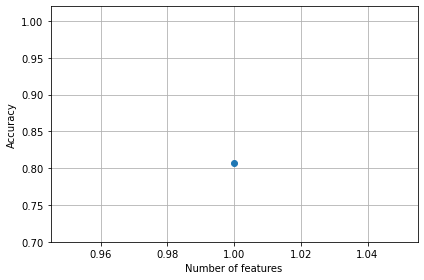

In [35]:
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat,sbs.scores_,marker='o')
plt.ylim([0.7,1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()